# AI-Powered E-Payment Fraud Detection System

To develop a machine learning model which can predict whether a transaction is fraudulent or not

Data Source: https://www.kaggle.com/datasets/ealaxi/paysim1/data

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn import datasets
from sklearn.tree import plot_tree
import warnings

In [2]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [3]:
# Read the data source into python dataframe
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

# View dimension of data source
df.shape

(6362620, 11)

In [4]:
# Display the first few rows to understand the structure of the dataset
print("\n--- First 5 Rows ---")
df.head()


--- First 5 Rows ---


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Descriptive or summary statistics
df.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


In [7]:
# Check for any missing data
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
# Extract the features and target into X and y respectively
X = df.drop('isFraud', axis=1)  #drop the first column which is the target and axis=1 means sum across rows to form new column
y = df['isFraud']

In [10]:
non_binary_features = ['step', 'amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in non_binary_features:
    if col in X.columns:
        print(f"\n   Unique values for {col}: {X[col].unique()}")


   Unique values for step: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 24

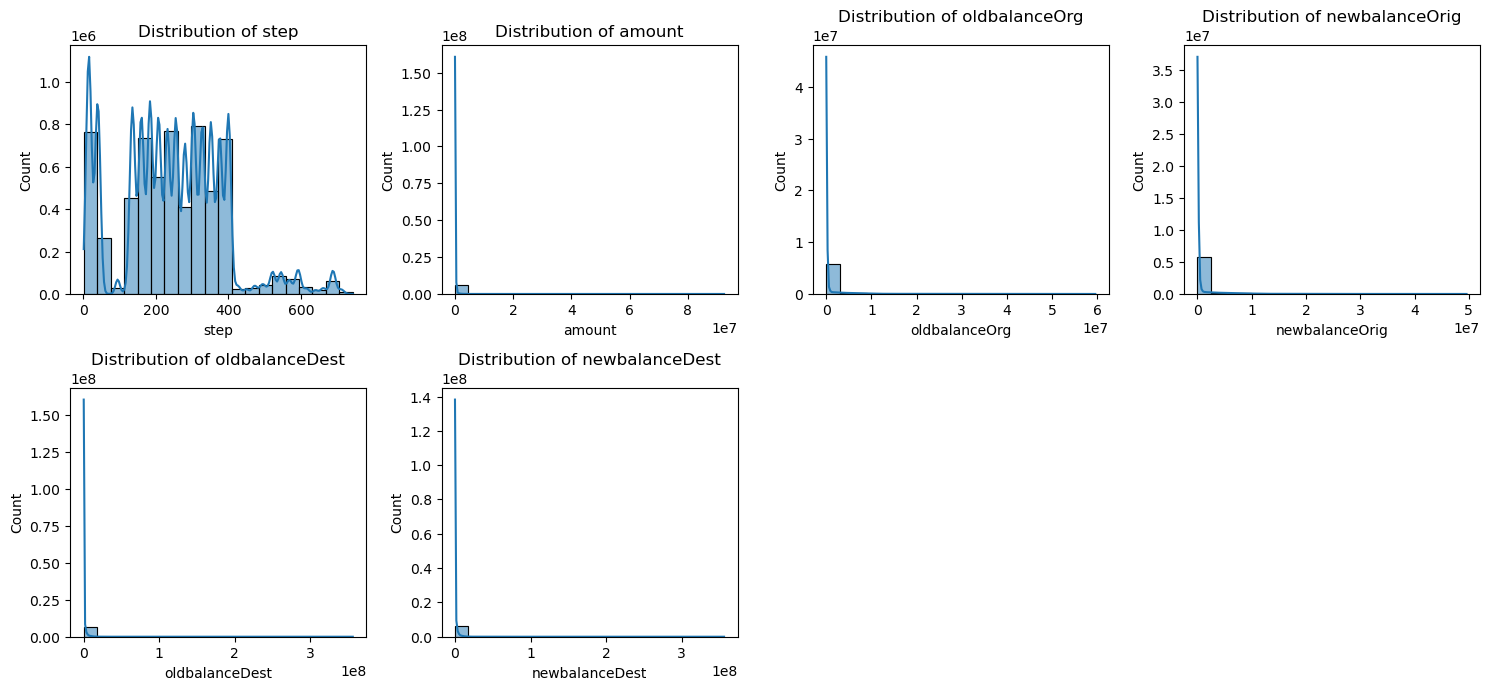

In [11]:
# Plot the distribution of each NonBinary features to check for skewness
plt.figure(figsize=(15, 10))
for i, feature in enumerate(non_binary_features):
    if feature in X.columns:
        plt.subplot(3, 4, i + 1)
        sns.histplot(X[feature], kde=True, bins=20)
        plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [12]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

There are 8213 Frauds

In [13]:
round((df["isFraud"].value_counts()[1]/df.shape[0]) * 100,3)

np.float64(0.129)

0.129 percent of the dataset is Fraud

In [14]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [15]:
round((df["isFlaggedFraud"].value_counts()[1]/df.shape[0]) * 100,3)

np.float64(0.0)

very small percentage isFlaggedFraud

<function matplotlib.pyplot.show(close=None, block=None)>

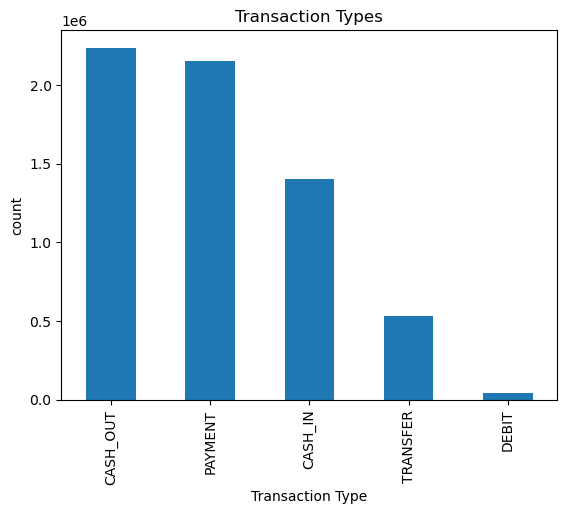

In [16]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("count")
plt.show

We can see that "CASH_OUT" is the most common type of transaction, followed by "PAYMENT", "CASH-IN", "TRANSFER", "DEBIT"

<function matplotlib.pyplot.show(close=None, block=None)>

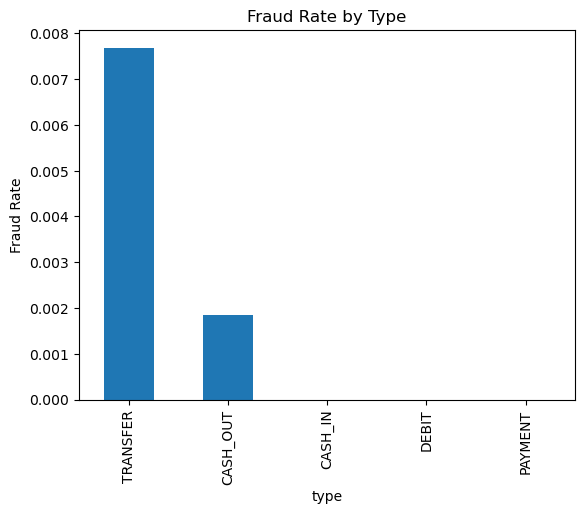

In [17]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type")
plt.ylabel("Fraud Rate")
plt.show

We can see that "TRANSFER" and "CASH_OUT" are the top 2 transaction type that are most proned to Fraud.

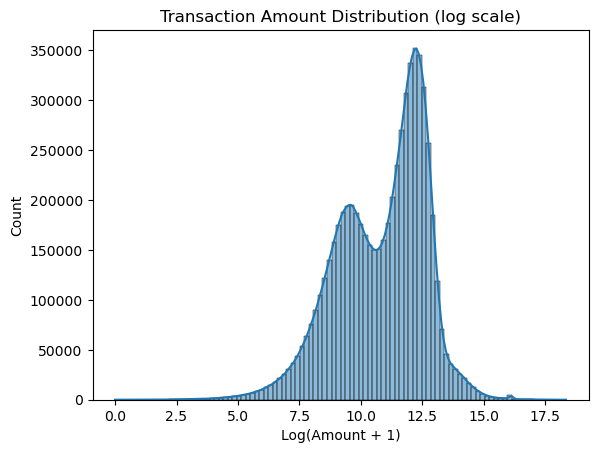

In [18]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde = True)
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

### above histogram visualize the distribution of transaction amounts 
applies the natural logarithm transformation, specifically the log(1+x) because transaction amounts often have a highly skewed distribution, with many small transactions and a few very large ones, helps to make the data's distribution more symmetrical

Bimodal distribution - two peaks, 
Highly concentrated - suggests two different types of transactions (TRANSFER and CASH_OUT) while relatively low number for other transactions
Right Skew - 

reading x-axis  a value of 10 on the x-axis corresponds to an original amount of exp(10) - 1, which is approximately $22,025.




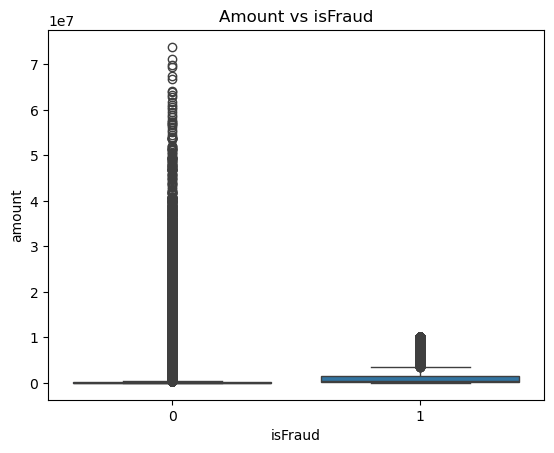

In [19]:
sns.boxplot(data= df[df["amount"]<92445516], x = "isFraud", y = "amount")
plt.title("Amount vs isFraud")
plt.show()

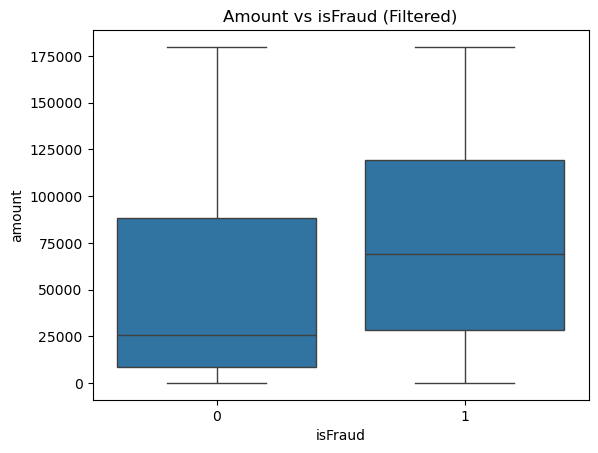

In [20]:
sns.boxplot(data= df[df["amount"]<179861], x = "isFraud", y = "amount")
plt.title("Amount vs isFraud (Filtered)")
plt.show()

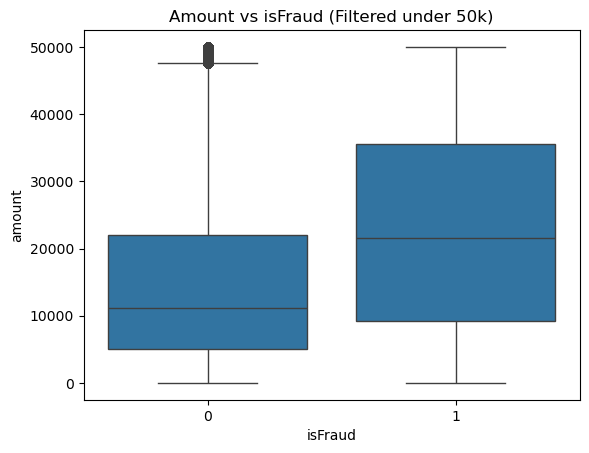

In [21]:
sns.boxplot(data= df[df["amount"]<50000], x = "isFraud", y = "amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [22]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [23]:
df["balanceDiffOrig"] < 0 

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: balanceDiffOrig, Length: 6362620, dtype: bool

In [24]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

1399253 balance difference of the Original have negative value 

In [25]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [26]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


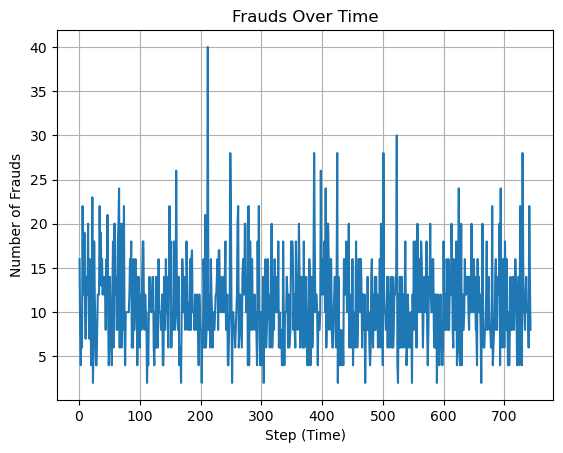

In [27]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label = "Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

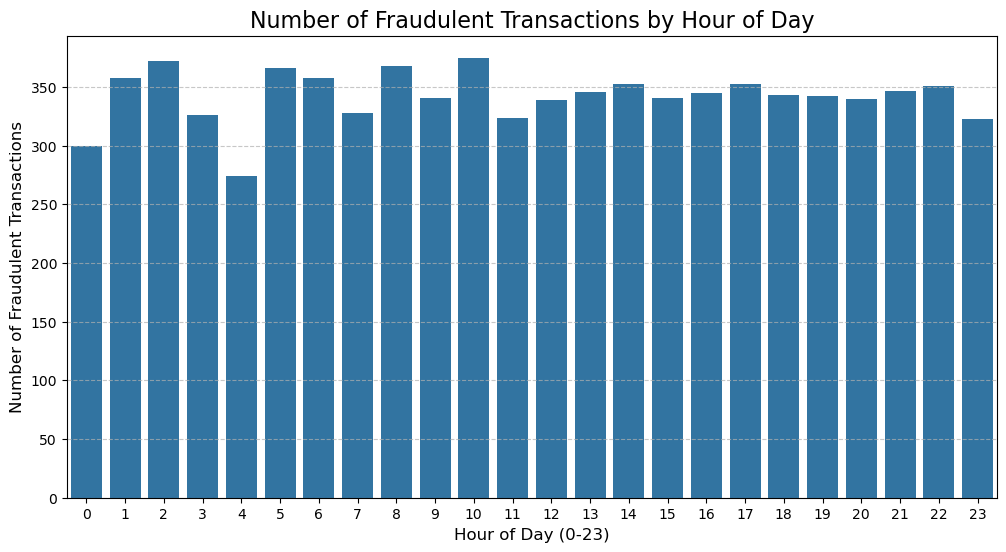

In [28]:
# Create a new column 'hour_of_day' by taking the remainder of 'step' divided by 24
df['hour_of_day'] = df['step'] % 24

# Filter the DataFrame to include only fraudulent transactions (isFraud == 1)
fraudulent_transactions = df[df['isFraud'] == 1]

# Count the number of fraudulent transactions for each hour and sort the result by index
fraud_counts = fraudulent_transactions['hour_of_day'].value_counts().sort_index()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Number of Fraudulent Transactions by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day (0-23)", fontsize=12)
plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,hour_of_day
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,1


In [30]:
top_senders = df["nameOrig"].value_counts().head(10)

In [31]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [32]:
top_receivers = df["nameDest"].value_counts().head(10)

In [33]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [34]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [35]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
Name: count, dtype: int64

In [36]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [37]:
fraud_types.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,hour_of_day
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44,1
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89,1


In [38]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

Text(0.5, 1.0, 'Fraud Distribution in Transfer & Cash_Out')

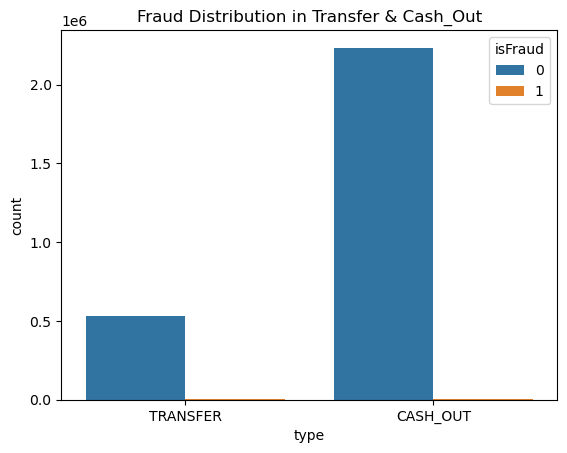

In [39]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")


In [40]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [41]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

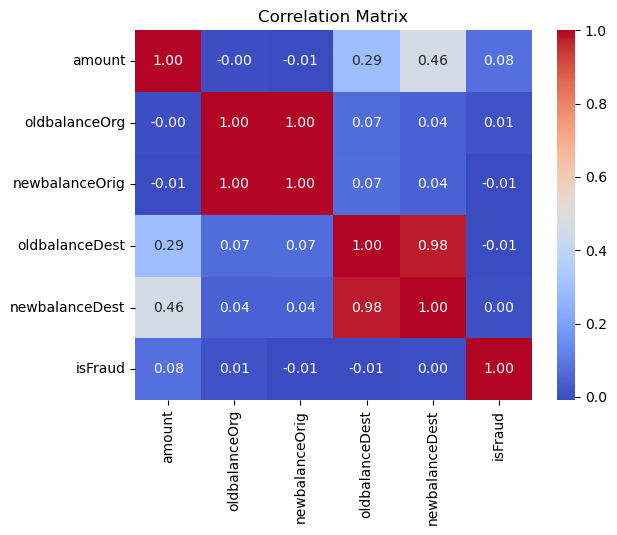

In [42]:
sns.heatmap(corr,annot=True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")

In [43]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [44]:
len(zero_after_transfer)

1188074

In [45]:
zero_after_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,hour_of_day
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44,1
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89,1


## Feature Engineering

In [46]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,hour_of_day
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,1


In [47]:
#select features to be used in modelling

In [48]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis = 1)

In [49]:
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest,hour_of_day
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0,1
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0,1
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0,1


In [50]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [51]:
X = df_model.drop("isFraud", axis = 1)
y = df_model["isFraud"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

## Pre-processing

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat",OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [54]:
# Function to evaluate and print results
def evaluate_model(model_name, y_true, y_pred, y_prob=None):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n   --- {model_name} Performance ---")
    print(f"   Test Accuracy: {accuracy:.4f}")
    print(f"   Classification Report:\n{classification_report(y_true, y_pred, target_names=['Not Fraud', 'Fraud'])}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Not Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Not Fraud', 'Actual Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    if y_prob is not None and y_prob.ndim > 1 and y_prob.shape[1] > 1:
        # For binary classification, we need probabilities of the positive class (class 1)
        y_prob_positive = y_prob[:, 1]
        
        # Calculate precision and recall for all possible thresholds
        precision, recall, _ = precision_recall_curve(y_true, y_prob_positive)
        pr_auc = auc(recall, precision)

        # Plot the Precision-Recall Curve
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, color='b', label=f'PR Curve (AUC = {pr_auc:.4f})')
        
        # Add a baseline for a random classifier
        no_skill = len(y_true[y_true==1]) / len(y_true)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='red', label=f'Random Classifier Baseline ({no_skill:.4f})')
        
        plt.xlabel('Recall (True Positive Rate)')
        plt.ylabel('Precision (Positive Predictive Value)')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend()
        plt.grid(True)
        plt.show()
    

## Baseline Model (Logistic Regression)

In [55]:
pipeline_lr_unweighted = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [56]:
# Train the unweighted pipeline
pipeline_lr_unweighted.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [57]:
# Make predictions
y_pred_lr_unweighted = pipeline_lr_unweighted.predict(X_test)
y_pred_proba_lr_unweighted = pipeline_lr_unweighted.predict_proba(X_test)


   --- Logistic Regression (Unweighted) Performance ---
   Test Accuracy: 0.9991
   Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.90      0.38      0.54      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



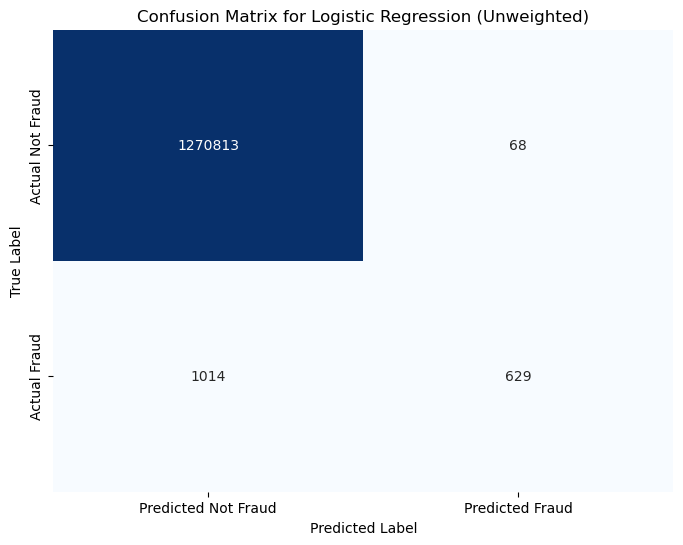

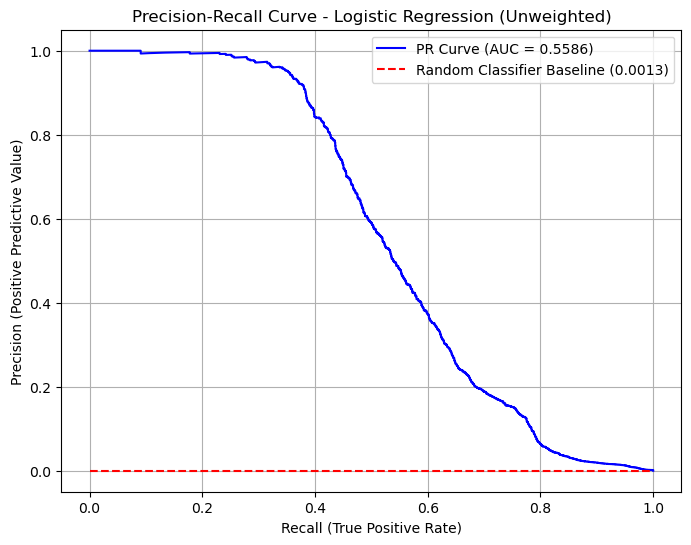

In [58]:
# Evaluate_model
evaluate_model(
    model_name="Logistic Regression (Unweighted)",
    y_true=y_test,
    y_pred=y_pred_lr_unweighted,
    y_prob=y_pred_proba_lr_unweighted
)

The model has a very high accuracy due to the imbalanced data, but  very low recall (0.38) for the Fraud class.
For this problem with severe class imbalance, accuracy is a misleading metric. A model that predicts "Not Fraud" for every single transaction could still achieve an accuracy of over 99%, but it would be completely useless. 
To solve the imbalance problem, we will try two techniques - Weighted and SMOTE.

In [59]:
import numpy as np
# Assuming y_pred_lr_unweighted is your array of predictions
prediction_counts = np.bincount(y_pred_lr_unweighted)
print("Predicted Class Counts (0=Not Fraud, 1=Fraud):", prediction_counts)

Predicted Class Counts (0=Not Fraud, 1=Fraud): [1271827     697]


## Logistic Regression (Weighted)

In [60]:
pipeline_lr_weighted = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier",LogisticRegression(class_weight="balanced", max_iter=1000))   #balanced so as to handle class imbalance situation
])

In [61]:
# Train the unweighted pipeline
pipeline_lr_weighted.fit(X_train, y_train)   #train model with preprocessing 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [62]:
y_pred_lr_weighted = pipeline_lr_weighted.predict(X_test) #Make Predictions (Get the predicted class labels)
y_pred_proba_lr_weighted = pipeline_lr_weighted.predict_proba(X_test) #Make Predictions (Get the predicted probabilities for each class)


   --- Logistic Regression (Weighted) Performance ---
   Test Accuracy: 0.9461
   Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97   1270881
       Fraud       0.02      0.94      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



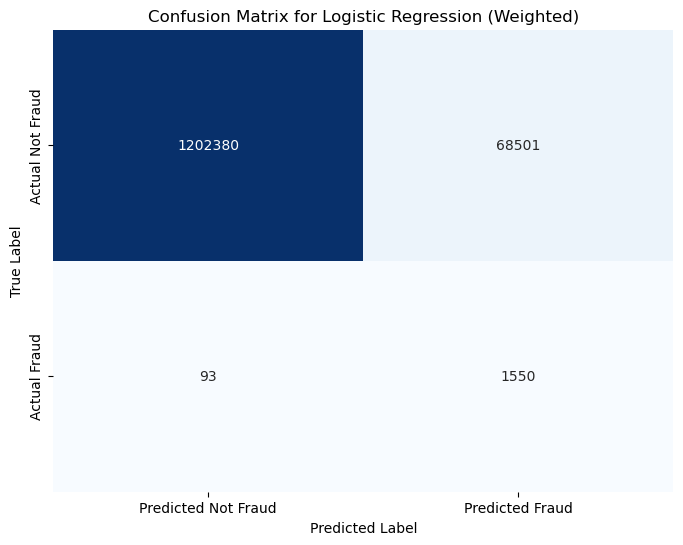

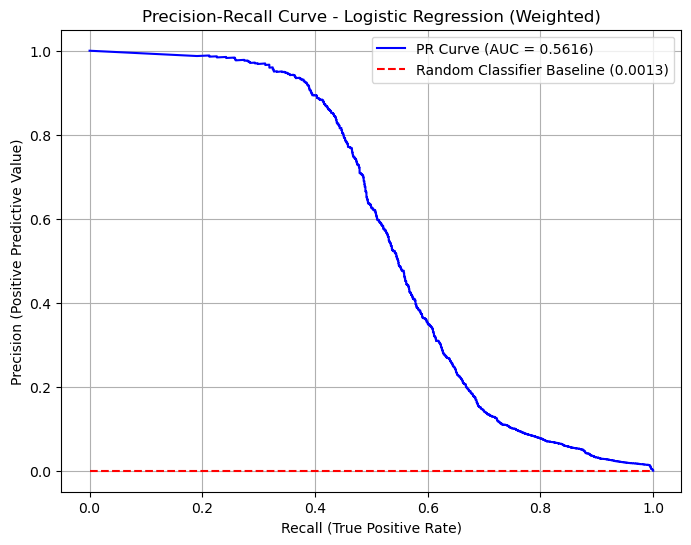

In [63]:
# Evaluate model
evaluate_model(
    model_name="Logistic Regression (Weighted)",
    y_true=y_test,
    y_pred=y_pred_lr_weighted,
    y_prob=y_pred_proba_lr_weighted
)

The class_weight parameter will force the model to pay more attention to the minority class, significantly increasing the recall for the Fraud class from 0.38 to 0.94. However, at the cost of a drop in precision (0.90 to 0.82) and overall accuracy (1.00 to 0.95). 

Unweighted Model was very conservative. It made very few "Fraud" predictions, and when it did, it was almost always correct (high precision). However, it missed most of the fraudulent transactions (low recall), so its F1-score was low.

Weighted Model is the opposite. It successfully forced the model to prioritize catching fraud at all costs. It now has a very high recall of 94.3%, meaning it successfully identifies almost all fraudulent transactions.

However, the price for this high recall is a massive increase in false alarms. The model is now flagging 68,501 legitimate transactions as fraudulent. This caused your precision to drop to just 2.2%.

## Logistic Regression (SMOTE)

In [64]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [65]:
# The imblearn Pipeline is used to correctly handle SMOTE
pipeline_lr_smote = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [66]:
pipeline_lr_smote.fit(X_train, y_train)   #train model with preprocessing 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression(max_iter=1000))])

In [67]:
y_pred_lr_smote = pipeline_lr_smote.predict(X_test) #Make Predictions (Get the predicted class labels)
y_pred_proba_lr_smote = pipeline_lr_smote.predict_proba(X_test) #Make Predictions (Get the predicted probabilities for each class)


   --- Logistic Regression with SMOTE Performance ---
   Test Accuracy: 0.9460
   Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97   1270881
       Fraud       0.02      0.95      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



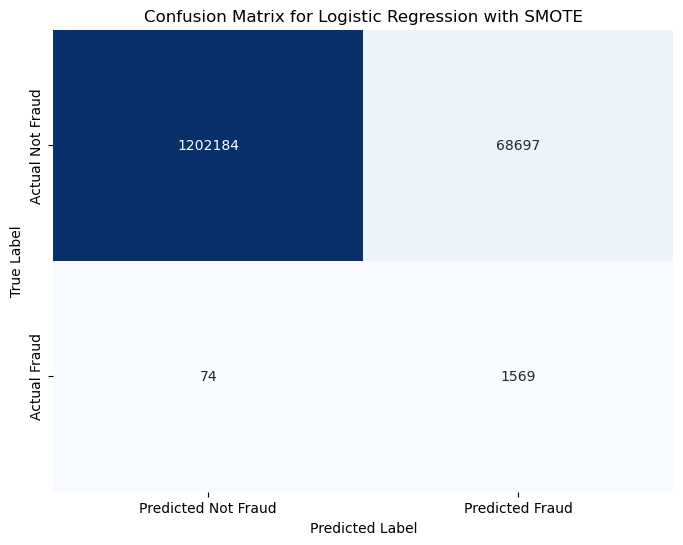

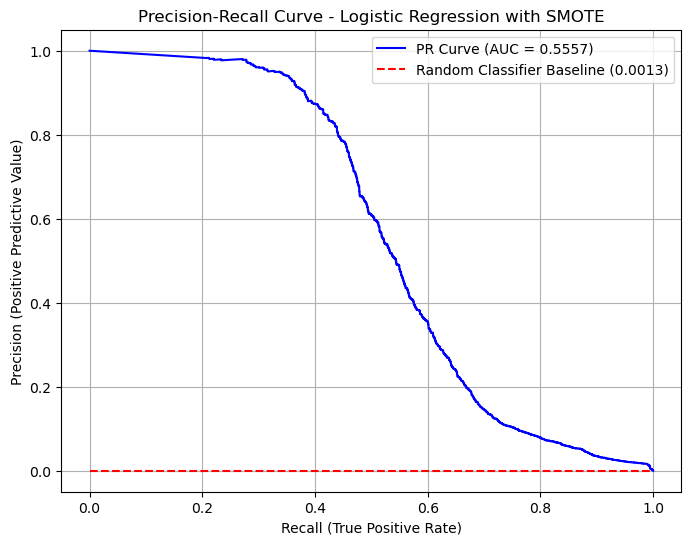

In [68]:
# Evaluate model
evaluate_model(
    model_name="Logistic Regression with SMOTE",
    y_true=y_test,
    y_pred=y_pred_lr_smote,
    y_prob=y_pred_proba_lr_smote
)

### Hypothesis

Comparing the two class imbalance techniques, class_weight performs slight better than SMOTE.

class_weight adjusts the model's loss function while SMOTE physically change the training data.

From Classification Report and Confusion Matrix:
High Recall: Both models are excellent at catching fraud, with a recall of 94% to 95%. This means they correctly identify over 94% of all fraudulent transactions, which is very good for a fraud detection system. The model with SMOTE has a slightly higher recall (1569 vs 1550 correctly identified fraud cases).

Low Precision: Both models have a very low precision of just 2%. This means that for every 100 transactions flagged as fraud, only 2 are actually fraudulent. This would lead to a very high number of false alarms (68,501 for class_weight vs. 68,697 for SMOTE).


From Precision-Recall Curve AUC:
The Precision-Recall curve AUC is a key metric for imbalanced data, and it shows a slight difference between the two approaches.

class_weight AUC: 0.5616

SMOTE AUC: 0.5557

A higher AUC indicates better overall performance across all possible classification thresholds. In this case, the class_weight="balanced" model is marginally better at balancing precision and recall, as its curve likely stays higher for a longer period.


The reason for the drop in F1-score from 0.54 for unweighted to 0.04 for weighted and SMOTE is most likely due to the highly engineered features created, specifically balanceDiffOrig and balanceDiffDest.
In many fraud datasets, fraudulent transactions have a very distinct signature. For instance, a common pattern is that the original account's balance becomes zero after the transaction, while the destination account's balance remains unchanged. Your model likely discovered this type of highly predictive feature and used it to achieve a high recall and precision.
The LogisticRegression model, even without weighting, can find these strong, linear relationships and use them to make accurate predictions. 

Logistic Regression model on this dataset, using class_weight="balanced" is slightly more effective than using SMOTE.

### Hyperparameter tuning of Logistic Regression (Weighted)

In [69]:
from sklearn.metrics import make_scorer, f1_score
# Define the hyperparameters to tune
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs']
}

In [70]:
# Define the scorer. We'll use the F1-score for the minority class (Fraud).
f1_scorer = make_scorer(f1_score, pos_label=1)

In [71]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    pipeline_lr_weighted,
    param_grid,
    cv=5,
    scoring=f1_scorer,
    verbose=1,
    n_jobs=-1
)

In [72]:
# Run the grid search on the training data
print("Starting Grid Search for hyperparameter tuning...")
grid_search.fit(X_train, y_train)
print("Grid Search complete.")

Starting Grid Search for hyperparameter tuning...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Grid Search complete.


In [73]:
# Get the best model
best_model = grid_search.best_estimator_

In [111]:
# --- Evaluate the Best Model ---
print("\n--- Best Model from Grid Search ---")
print("Best hyperparameters found:", grid_search.best_params_)


--- Best Model from Grid Search ---
Best hyperparameters found: {'classifier__C': 1, 'classifier__solver': 'liblinear'}


In [74]:
# Make predictions with the best model
y_pred_lr_best = best_model.predict(X_test)
y_pred_proba_lr_best = best_model.predict_proba(X_test)


   --- Logistic Regression with GridSearchCV Performance ---
   Test Accuracy: 0.9466
   Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97   1270881
       Fraud       0.02      0.94      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



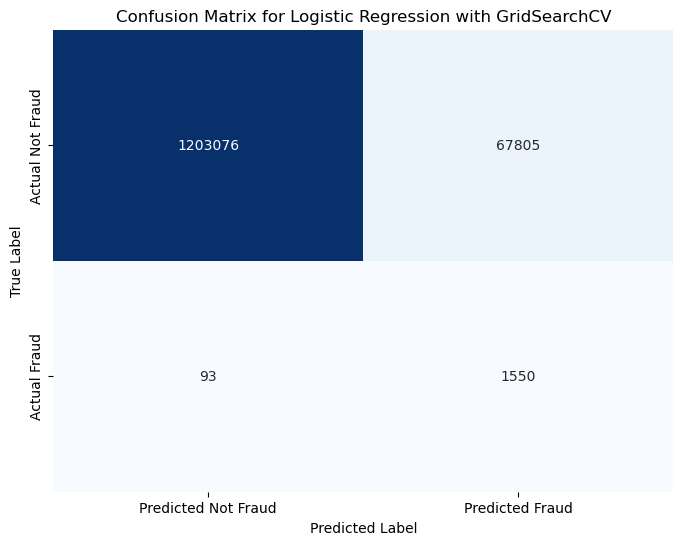

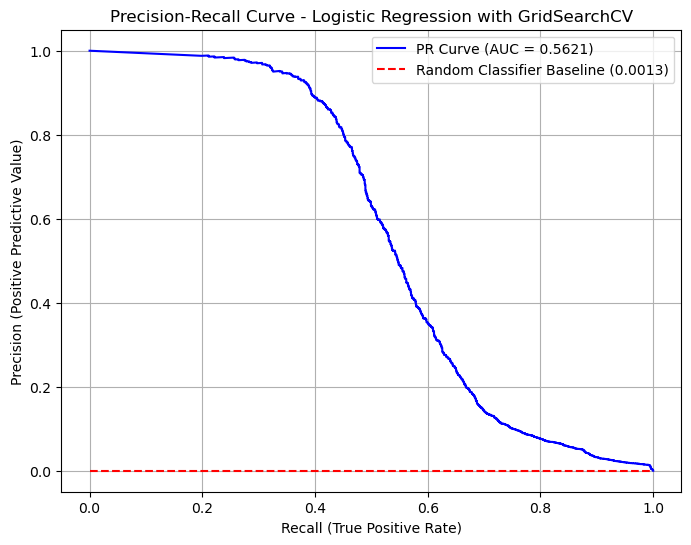

In [75]:
# Evaluate model
evaluate_model(
    model_name="Logistic Regression with GridSearchCV",
    y_true=y_test,
    y_pred=y_pred_lr_best,
    y_prob=y_pred_proba_lr_best
)

False positive dropped from 68501 to 67805 after Hyperparameter tuning with GridSearchCV
AUC also increased from 0.5616 to 0.5621

## Random Forest Classifier (Unweighted)

In [76]:
pipeline_rf_unweighted = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [77]:
# Train the RandomForest pipeline
pipeline_rf_unweighted.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [78]:
# Make predictions and evaluate
y_pred_rf = pipeline_rf_unweighted.predict(X_test)
y_pred_proba_rf = pipeline_rf_unweighted.predict_proba(X_test)


   --- RandomForest (Unweighted) Performance ---
   Test Accuracy: 0.9997
   Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.96      0.79      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.90      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



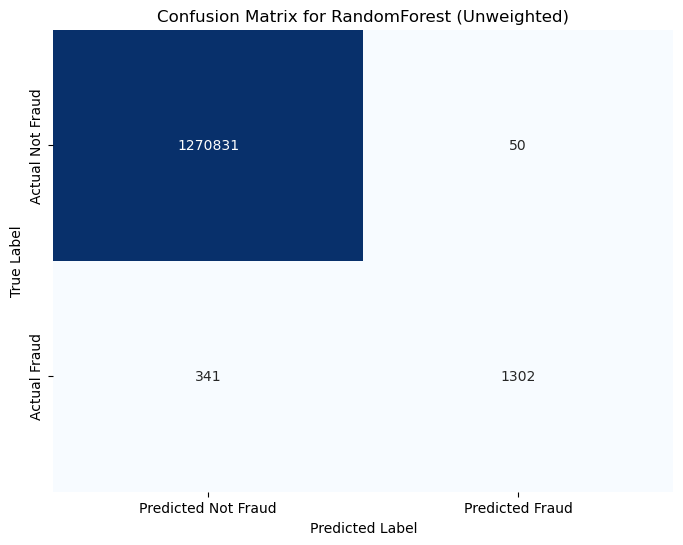

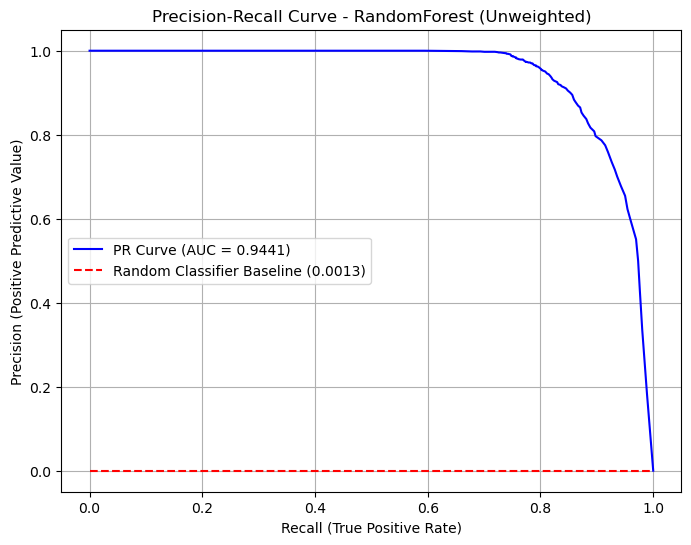

In [79]:
evaluate_model(
    model_name="RandomForest (Unweighted)",
    y_true=y_test,
    y_pred=y_pred_rf,
    y_prob=y_pred_proba_rf
)

## Random Forest Classifier (Weighted)

In [80]:
pipeline_rf_weighted = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight="balanced", random_state=42))
])

In [81]:
# Train the RandomForest pipeline
pipeline_rf_weighted.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [82]:
y_pred_rf_weighted = pipeline_rf_weighted.predict(X_test)
y_pred_proba_rf_weighted = pipeline_rf_weighted.predict_proba(X_test)


   --- RandomForest (Weighted) Performance ---
   Test Accuracy: 0.9997
   Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.96      0.79      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



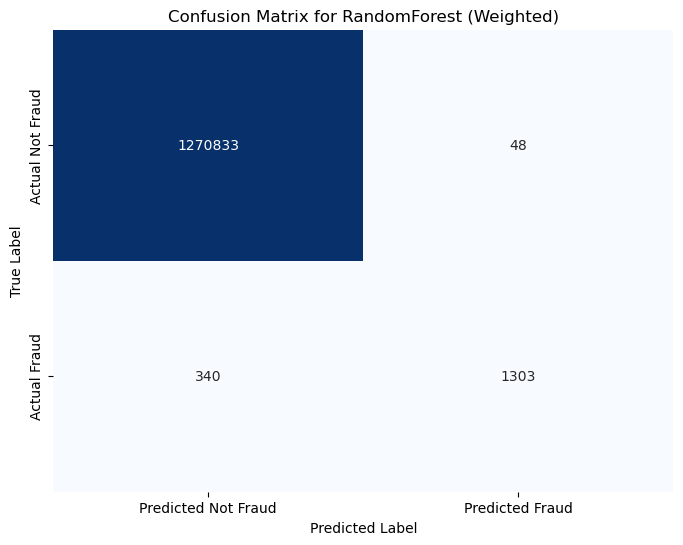

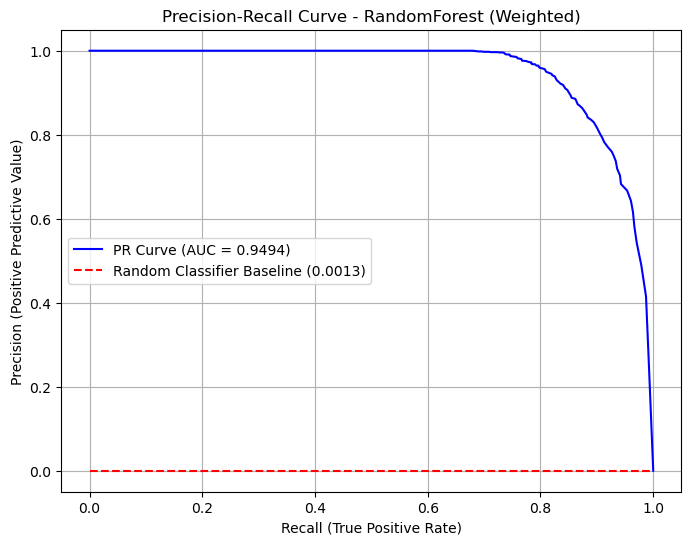

In [83]:
evaluate_model(
    model_name="RandomForest (Weighted)",
    y_true=y_test,
    y_pred=y_pred_rf_weighted,
    y_prob=y_pred_proba_rf_weighted
)

### Hyperparameter tuning of Random Forest Classifier (Weighted)

In [87]:
# Define the hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5]
}

In [88]:
# Define the scorer using the F1-score for the minority class (Fraud)
f1_scorer = make_scorer(f1_score, pos_label=1)

In [109]:
# Set up GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_search_rf = RandomizedSearchCV(
    pipeline_rf_weighted,
    param_distributions=param_grid,
    n_iter=2, # Test 10 random combinations
    cv=2,  # Use 3-fold cross-validation for faster execution
    scoring=f1_scorer,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

In [110]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


KeyboardInterrupt: 

## XGBoost

In [95]:
import xgboost as xgb

In [96]:
# Calculate the scale_pos_weight value for handling class imbalance
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

Calculated scale_pos_weight: 773.75


In [97]:
# Define the pipeline for XGBoost
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

In [98]:
# Train the XGBoost pipeline
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=N...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [99]:
# Make predictions and evaluate
y_pred_xgb = pipeline_xgb.predict(X_test)
y_pred_proba_xgb = pipeline_xgb.predict_proba(X_test)


   --- XGBoost with scale_pos_weight Performance ---
   Test Accuracy: 0.9904
   Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00   1270881
       Fraud       0.12      0.98      0.21      1643

    accuracy                           0.99   1272524
   macro avg       0.56      0.99      0.60   1272524
weighted avg       1.00      0.99      0.99   1272524



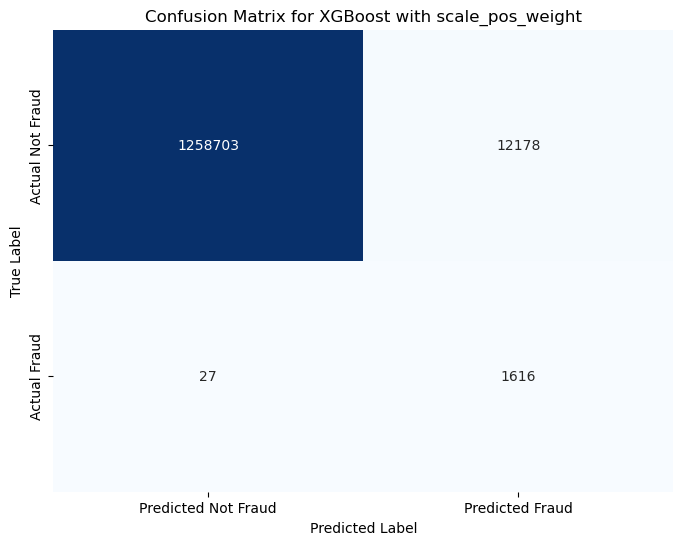

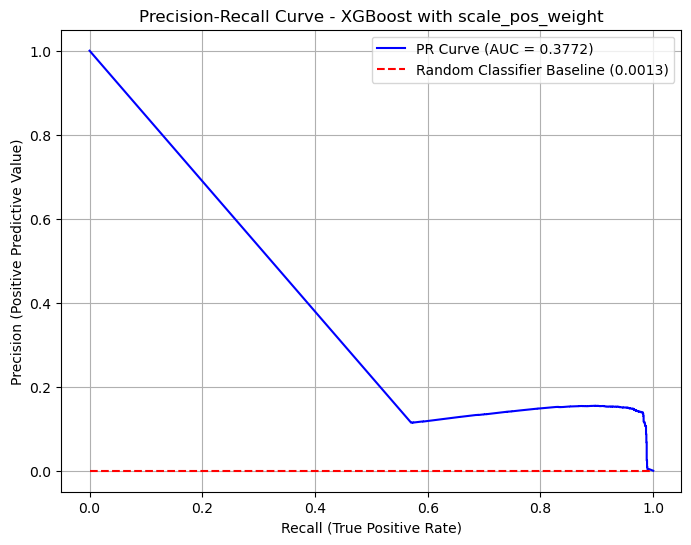

In [100]:
# Evaluate the model using your custom function
evaluate_model(
    model_name="XGBoost with scale_pos_weight",
    y_true=y_test,
    y_pred=y_pred_xgb,
    y_prob=y_pred_proba_xgb
)

### Hyperparameter tuning of XGBoost

In [101]:
# Define the hyperparameters to tune
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5]
}

In [102]:
# Define the scorer. We'll use the F1-score for the minority class (Fraud).
f1_scorer = make_scorer(f1_score, pos_label=1)

In [103]:
# Set up GridSearchCV
grid_search_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid_xgb,
    cv=3,  # Use 3-fold cross-validation for faster execution
    scoring=f1_scorer,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

In [104]:
# Run the grid search on the training data
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['amount',
                                                                          'oldbalanceOrg',
                                                                          'newbalanceOrig',
                                                                          'oldbalanceDest',
                                                                          'newbalanceDest']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['type'])])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_by...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
             verbose=1)

In [105]:
# --- Evaluate the Best Model ---
print("\n--- Best Model from Grid Search ---")
print("Best hyperparameters found:", grid_search_xgb.best_params_)


--- Best Model from Grid Search ---
Best hyperparameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}


In [106]:
# Get the best model
best_model_xgb = grid_search_xgb.best_estimator_

In [107]:
# Make predictions with the best model
y_pred_best_xgb = best_model_xgb.predict(X_test)
y_pred_proba_best_xgb = best_model_xgb.predict_proba(X_test)


   --- Tuned XGBoost Performance ---
   Test Accuracy: 0.9957
   Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.23      1.00      0.37      1643

    accuracy                           1.00   1272524
   macro avg       0.61      1.00      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



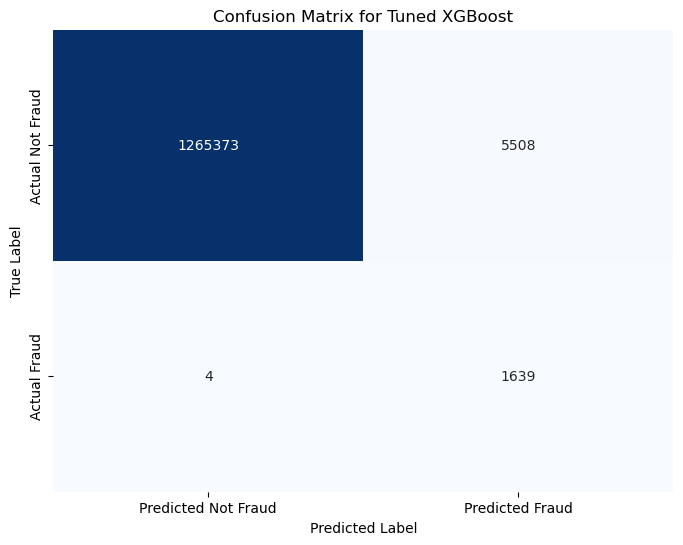

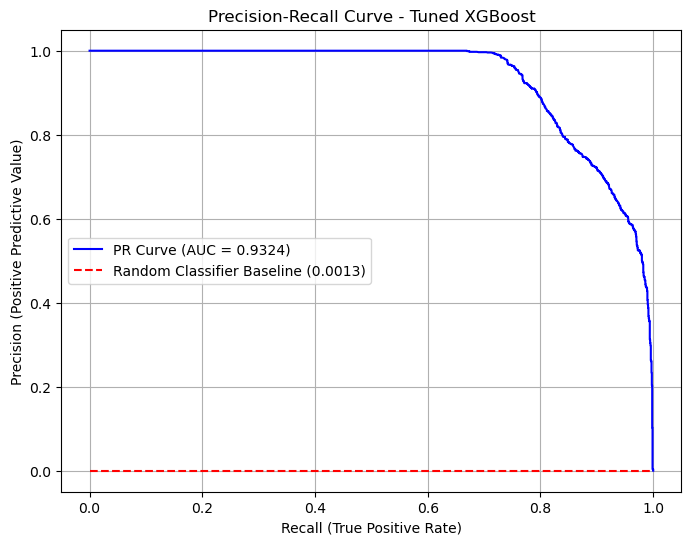

In [108]:
# Evaluate the final model using your function
evaluate_model(
    model_name="Tuned XGBoost",
    y_true=y_test,
    y_pred=y_pred_best_xgb,
    y_prob=y_pred_proba_best_xgb
)

Best pipeline -- RandomForestClassifier (Weighted) 

## Export pipeline

In [112]:
import joblib
joblib.dump(pipeline_rf_weighted,"best_random_forest_model.joblib")

['best_random_forest_model.joblib']